In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import sys


In [3]:
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

SUPERSCRIPT_MAP = {
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴",
    "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"
}
# Create a translation table
TRANS_TABLE = str.maketrans(SUPERSCRIPT_MAP)

def SUP(text):
    """Converts digits in a string to superscript."""
    return str(text).translate(TRANS_TABLE)

def func1(n):
    if (n==1):
        return 0
    else:
        return 1+func1(n//2)

def func2(n):
    count=0
    for i in range(n):
        count +=1
    return count

def func3(n):
    count=0
    for i in range(n):
        m = n
        while (m>1):
            count+=1
            m = m // 2
    return count

def maxSubSum1(arr, idx=0, max_ending=0, max_so_far=0):
    """O(n) — Kadane rekursif (mengembalikan >= 0)."""
    if idx >= len(arr):
        return max_so_far
    max_ending = max(0, max_ending + arr[idx])
    max_so_far = max(max_so_far, max_ending)
    return maxSubSum1(arr, idx + 1, max_ending, max_so_far)

def maxSubSum2(arr, left, right):
    if left == right:
        return max(0, arr[left])

    center = (left + right) // 2
    maxLeftSum = maxSubSum2(arr, left, center)
    maxRightSum = maxSubSum2(arr, center + 1, right)

    maxLeftBorderSum = 0
    leftBorderSum = 0
    for i in range(center, left - 1, -1):
        leftBorderSum += arr[i]
        if leftBorderSum > maxLeftBorderSum:
            maxLeftBorderSum = leftBorderSum

    maxRightBorderSum = 0
    rightBorderSum = 0
    for i in range(center + 1, right + 1):
        rightBorderSum += arr[i]
        if rightBorderSum > maxRightBorderSum:
            maxRightBorderSum = rightBorderSum

    return max(maxLeftSum, maxRightSum, maxLeftBorderSum + maxRightBorderSum)

def maxSubSum3(arr, i=0):
    """O(n^2) — versi rekursif dari brute-force (mengembalikan >= 0)."""
    n = len(arr)
    if i >= n:
        return 0

    # inner recursion menghitung semua sum mulai dari i
    def inner(j, current_sum, best):
        if j >= n:
            return best
        current_sum += arr[j]
        if current_sum > best:
            best = current_sum
        return inner(j + 1, current_sum, best)

    best_from_i = inner(i, 0, 0)
    best_rest = maxSubSum3(arr, i + 1)
    return max(best_from_i, best_rest)

def eksperimen1(k):
    n = 2**k
    print("=" * 40)
    print(f"Eksperimen untuk n = 2{SUP(str(k))}")
    print("=" * 40)
    print(f"{'Run #':<8} {'Time (µs)':<12}")
    print("-" * 20)
    t_avg=0
    for i in range(5):
        start = time.perf_counter()
        result = func1(n)
        end = time.perf_counter()
        t = (end - start) * 1_000_000
        t_avg = t_avg + t/5
        print(f"{i+1:<8} {t:<12.2f}")
    print("-" * 20)
    print(f"{'Rata-rata':<8} {t_avg:<12.2f}")
    print("=" * 40)
    print()
    return k, n, t_avg

def tabel_eksperimen1(data):
    print("\n" + "=" * 60)
    print("HASIL EKSPERIMEN WAKTU EKSEKUSI FUNGSI REKURSIF")
    print("=" * 60)
    print(f"{'Eksponen (k)':<15} {'n = 2^k':<20} {'Waktu Rata-rata (µs)':<20}")
    print("-" * 60)

    for k, n, waktu in data:
        n_value = n
        # Format n dalam notasi ilmiah untuk nilai besar
        if k > 50:
            n_str = f"2{SUP(str(k))} ≈ {n_value:.2e}"
        else:
            n_str = f"2{SUP(str(k))} = {n_value}"

        print(f"{k:<15} {n_str:<20} {waktu:<20.2f}")

    print("=" * 60)

def plot_hasil_eksperimen1(data):
    # Ekstrak data
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    waktu_values = [item[2] for item in data]

    # Buat figure dengan 2 subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: n vs waktu (skala linear)
    ax1.plot(n_values, waktu_values, 'bo-', linewidth=2, markersize=8, label='Waktu Eksekusi')
    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Hubungan n vs Waktu Eksekusi (Skala Linear)', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Tambahkan anotasi untuk titik-titik data
    for i, (n, waktu) in enumerate(zip(n_values, waktu_values)):
        ax1.annotate(f'2^{k_values[i]}', (n, waktu),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

    # Plot 2: n vs waktu (skala logaritmik)
    ax2.plot(n_values, waktu_values, 'ro-', linewidth=2, markersize=8, label='Waktu Eksekusi')
    ax2.set_xscale('log', base=2)
    ax2.set_xlabel('Nilai n (skala log basis 2)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax2.set_title('Hubungan n vs Waktu Eksekusi (Skala Logaritmik)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # Tambahkan anotasi untuk titik-titik data
    for i, (n, waktu) in enumerate(zip(n_values, waktu_values)):
        ax2.annotate(f'2^{k_values[i]}', (n, waktu),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Plot 3: k vs waktu (karena n = 2^k)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, waktu_values, 'go-', linewidth=2, markersize=8)
    plt.xlabel('Eksponen k (dimana n = 2^k)', fontsize=12)
    plt.ylabel('Waktu Eksekusi (µs)', fontsize=12)
    plt.title('Hubungan k vs Waktu Eksekusi', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Tambahkan anotasi
    for i, (k, waktu) in enumerate(zip(k_values, waktu_values)):
        plt.annotate(f'n=2^{k}', (k, waktu),
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()


def eksperimen2(k):
    n = 10**k
    print("=" * 40)
    print(f"Eksperimen untuk n = 10{SUP(str(k))}")
    print("=" * 40)
    print(f"{'Run #':<8} {'O(n) Time (µs)':<15} {'O(nlog(n)) Time (µs)':<20}")
    print("-" * 50)
    t2_avg=0
    t3_avg=0
    for i in range(5):
        start2 = time.perf_counter()
        result = func2(n)
        end2 = time.perf_counter()

        start3 = time.perf_counter()
        result = func3(n)
        end3 = time.perf_counter()

        t2 = (end2 - start2) * 1_000_000
        t2_avg = t2_avg + t2/5

        t3 = (end3 - start3) * 1_000_000
        t3_avg = t3_avg + t3/5

        print(f"{i+1:<8} {t2:<15.2f} {t3:<20.2f}")
    print("-" * 50)
    print(f"{'Rata-rata':<8} {t2_avg:<15.2f} {t3_avg:<20.2f}")
    print("=" * 40)
    print()
    return k, n, t2_avg, t3_avg

def buat_tabel_eksperimen2(data):
    print("\n" + "=" * 80)
    print("HASIL EKSPERIMEN PERBANDINGAN KOMPLEKSITAS O(n) vs O(n log n)")
    print("=" * 80)
    print(f"{'Eksponen (k)':<12} {'n = 10^k':<15} {'O(n) Time (µs)':<18} {'O(n log n) Time (µs)':<20} {'Rasio O(n log n)/O(n)':<20}")
    print("-" * 80)

    for k, n, t2, t3 in data:
        rasio = t3 / t2 if t2 > 0 else 0
        print(f"{k:<12} {f'10{SUP(str(k))}':<15} {t2:<18.2f} {t3:<20.2f} {rasio:<20.2f}")

    print("=" * 80)

def buat_grafik_eksperimen2(data):
    # Ekstrak data
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t2_values = [item[2] for item in data]  # O(n) times
    t3_values = [item[3] for item in data]  # O(n log n) times

    # Buat figure dengan multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Perbandingan langsung O(n) vs O(n log n) - skala linear
    ax1.plot(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n)')
    ax1.plot(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n)')
    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Perbandingan Waktu: O(n) vs O(n log n)\n(Skala Linear)', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Anotasi titik data
    for i, (n, t2, t3) in enumerate(zip(n_values, t2_values, t3_values)):
        ax1.annotate(f'10^{k_values[i]}', (n, t2), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9, color='blue')
        ax1.annotate(f'10^{k_values[i]}', (n, t3), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9, color='red')

    # Plot 2: Perbandingan dengan skala log-log
    ax2.loglog(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n)')
    ax2.loglog(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n)')
    ax2.set_xlabel('Nilai n (log scale)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs) (log scale)', fontsize=12)
    ax2.set_title('Perbandingan Waktu: O(n) vs O(n log n)\n(Skala Log-Log)', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Rasio O(n log n) / O(n)
    rasio_values = [t3 / t2 for t2, t3 in zip(t2_values, t3_values)]
    ax3.plot(k_values, rasio_values, 'go-', linewidth=2, markersize=8)
    ax3.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax3.set_ylabel('Rasio O(n log n) / O(n)', fontsize=12)
    ax3.set_title('Rasio Waktu Eksekusi\nO(n log n) / O(n)', fontsize=14)
    ax3.grid(True, alpha=0.3)

    # Anotasi rasio
    for i, (k, rasio) in enumerate(zip(k_values, rasio_values)):
        ax3.annotate(f'{rasio:.2f}', (k, rasio), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

    # Plot 4: Pertumbuhan relatif terhadap teori
    # Teori: O(n) seharusnya linear, O(n log n) seharusnya n log n
    # Normalisasi dengan nilai pertama
    t2_normalized = [t / t2_values[0] for t in t2_values]
    t3_normalized = [t / t3_values[0] for t in t3_values]

    # Teori: untuk O(n), pertumbuhan seharusnya n/n0
    teori_t2 = [n / n_values[0] for n in n_values]
    # Untuk O(n log n), pertumbuhan seharusnya (n log n)/(n0 log n0)
    teori_t3 = [(n * np.log(n)) / (n_values[0] * np.log(n_values[0])) for n in n_values]

    ax4.plot(k_values, t2_normalized, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax4.plot(k_values, teori_t2, 'b--', linewidth=1, label='O(n) Teori')
    ax4.plot(k_values, t3_normalized, 'ro-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')
    ax4.plot(k_values, teori_t3, 'r--', linewidth=1, label='O(n log n) Teori')
    ax4.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax4.set_ylabel('Waktu Normalisasi', fontsize=12)
    ax4.set_title('Perbandingan Eksperimen vs Teori\n(Waktu Dinormalisasi)', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return rasio_values
def eksperimen3(k):
    def generate_arr(n=16, low=-20, high=20, seed=None):
            if seed is not None:
                np.random.seed(seed)
            return np.random.randint(low, high + 1, size=n).tolist()

    n = round(10**k)
    arr = generate_arr(n, -10, 15, 42)
    print("=" * 60)
    print(f"Eksperimen untuk n = 10{SUP(str(k))}")
    print("=" * 60)
    print(f"{'Run #':<8} {'O(n) (µs)':<15} {'O(nlog(n)) (µs)':<20} {'O(n²) (µs)':<20}")
    print("-" * 60)
    t1_avg=0
    t2_avg=0
    t3_avg=0
    for i in range(5):
        start1 = time.perf_counter()
        result1 = maxSubSum1(arr)
        end1 = time.perf_counter()

        start2 = time.perf_counter()
        result2 = maxSubSum2(arr, 0, len(arr) - 1)
        end2 = time.perf_counter()

        start3 = time.perf_counter()
        result3 = maxSubSum3(arr)
        end3 = time.perf_counter()

        t1 = (end1 - start1) * 1_000_000
        t1_avg = t1_avg + t1/5

        t2 = (end2 - start2) * 1_000_000
        t2_avg = t2_avg + t2/5

        t3 = (end3 - start3) * 1_000_000
        t3_avg = t3_avg + t3/5
        print(f"{i+1:<8} {t1:<15.2f} {t2:<20.2f} {t3:<30.2f}")

    print("-" * 60)
    print(f"{'Rata-rata':<8} {t1_avg:<15.2f}  {t2_avg:<15.2f} {t3_avg:<30.2f}")
    print("=" * 60)
    print()
    return k, n, t1_avg,  t2_avg, t3_avg

def buat_tabel_eksperimen3(data):
    print("=" * 100)
    print("HASIL EKSPERIMEN PERBANDINGAN KOMPLEKSITAS ALGORITMA")
    print("=" * 100)
    print(f"{'Eksponen (k)':<12} {'n = 10ᵏ':<15} {'O(n) (µs)':<15} {'O(n log n) (µs)':<20} {'O(n²) (µs)':<15}")
    print("-" * 100)

    for k, n, t1, t2, t3 in data:
      print(f"{k:<12} {n:<15} {t1:<15.2f} {t2:<20.2f} {t3:<15.2f}")
import matplotlib.pyplot as plt
import numpy as np

def buat_grafik_eksperimen3(data):
    """
    Membuat grafik perbandingan waktu eksekusi untuk tiga kompleksitas algoritma
    dari data eksperimen.

    Parameters:
    data : list of tuples
        List berisi tuple (k, n, t1, t2, t3) dimana:
        - k: eksponen (n = 10^k)
        - n: ukuran array
        - t1: waktu rata-rata O(n) dalam µs
        - t2: waktu rata-rata O(n log n) dalam µs
        - t3: waktu rata-rata O(n²) dalam µs
    """

    # Ekstrak data
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t1_values = [item[2] for item in data]  # O(n)
    t2_values = [item[3] for item in data]  # O(n log n)
    t3_values = [item[4] for item in data]  # O(n²)

    # Buat figure dengan 2 subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # ===== PLOT 1: Grafik Linear =====
    ax1.plot(k_values, t1_values, 'bo-', linewidth=3, markersize=10, label='O(n)', markerfacecolor='blue', markeredgecolor='darkblue')
    ax1.plot(k_values, t2_values, 'go-', linewidth=3, markersize=10, label='O(n log n)', markerfacecolor='green', markeredgecolor='darkgreen')
    ax1.plot(k_values, t3_values, 'ro-', linewidth=3, markersize=10, label='O(n²)', markerfacecolor='red', markeredgecolor='darkred')

    ax1.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12, fontweight='bold')
    ax1.set_title('Perbandingan Kompleksitas Algoritma\n(Skala Linear)', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(k_values)

    # Annotasi titik data
    for i, (k, t1, t2, t3) in enumerate(zip(k_values, t1_values, t2_values, t3_values)):
        ax1.annotate(f'{t1:.1f}', (k, t1), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
        ax1.annotate(f'{t2:.1f}', (k, t2), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
        ax1.annotate(f'{t3:.1f}', (k, t3), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

    # ===== PLOT 2: Grafik Logaritmik =====
    # Plot dengan skala log pada sumbu y untuk melihat pertumbuhan eksponensial
    ax2.semilogy(k_values, t1_values, 'bo-', linewidth=3, markersize=10, label='O(n)', markerfacecolor='blue', markeredgecolor='darkblue')
    ax2.semilogy(k_values, t2_values, 'go-', linewidth=3, markersize=10, label='O(n log n)', markerfacecolor='green', markeredgecolor='darkgreen')
    ax2.semilogy(k_values, t3_values, 'ro-', linewidth=3, markersize=10, label='O(n²)', markerfacecolor='red', markeredgecolor='darkred')

    ax2.set_xlabel('Eksponen k (n = 10ᵏ)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Waktu Eksekusi (µs) - Skala Log', fontsize=12, fontweight='bold')
    ax2.set_title('Perbandingan Kompleksitas Algoritma\n(Skala Logaritmik)', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3, which='both')
    ax2.set_xticks(k_values)

    # Annotasi titik data untuk plot logaritmik
    for i, (k, t1, t2, t3) in enumerate(zip(k_values, t1_values, t2_values, t3_values)):
        ax2.annotate(f'{t1:.1f}', (k, t1), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
        ax2.annotate(f'{t2:.1f}', (k, t2), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')
        ax2.annotate(f'{t3:.1f}', (k, t3), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

    plt.tight_layout()
    plt.show()

    # # ===== ANALISIS NUMERIK =====
    # print("=" * 80)
    # print("ANALISIS PERBANDINGAN KOMPLEKSITAS ALGORITMA")
    # print("=" * 80)

    # # Hitung rasio pertumbuhan
    # for i in range(1, len(data)):
    #     k_prev, n_prev, t1_prev, t2_prev, t3_prev = data[i-1]
    #     k_curr, n_curr, t1_curr, t2_curr, t3_curr = data[i]

    #     ratio_n = n_curr / n_prev
    #     ratio_t1 = t1_curr / t1_prev
    #     ratio_t2 = t2_curr / t2_prev
    #     ratio_t3 = t3_curr / t3_prev

    #     print(f"\nDari n = 10^{k_prev} ke n = 10^{k_curr}:")
    #     print(f"  Pertumbuhan n: {ratio_n:.0f}x")
    #     print(f"  Pertumbuhan O(n): {ratio_t1:.2f}x (ideal: ~{ratio_n:.0f}x)")
    #     print(f"  Pertumbuhan O(n log n): {ratio_t2:.2f}x (ideal: ~{ratio_n * np.log10(n_curr)/np.log10(n_prev):.1f}x)")
    #     print(f"  Pertumbuhan O(n²): {ratio_t3:.2f}x (ideal: ~{ratio_n**2:.0f}x)")

# ===== FUNGSI TAMBAHAN: Visualisasi 3D jika diperlukan =====
def buat_grafik_3d_eksperimen3(data):
    """
    Versi alternatif dengan plot 3D untuk visualisasi yang lebih menarik
    """
    from mpl_toolkits.mplot3d import Axes3D

    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t1_values = [item[2] for item in data]
    t2_values = [item[3] for item in data]
    t3_values = [item[4] for item in data]

    fig = plt.figure(figsize=(15, 5))

    # Plot 3D
    ax1 = fig.add_subplot(131, projection='3d')

    # Plot titik-titik data
    ax1.scatter(k_values, n_values, t1_values, c='blue', s=100, label='O(n)')
    ax1.scatter(k_values, n_values, t2_values, c='green', s=100, label='O(n log n)')
    ax1.scatter(k_values, n_values, t3_values, c='red', s=100, label='O(n²)')

    # Plot garis
    ax1.plot(k_values, n_values, t1_values, 'b-', alpha=0.6)
    ax1.plot(k_values, n_values, t2_values, 'g-', alpha=0.6)
    ax1.plot(k_values, n_values, t3_values, 'r-', alpha=0.6)

    ax1.set_xlabel('Eksponen k')
    ax1.set_ylabel('Ukuran n')
    ax1.set_zlabel('Waktu (µs)')
    ax1.set_title('Perbandingan 3D Kompleksitas Algoritma')
    ax1.legend()

    # Plot permukaan (surface plot) - O(n)
    ax2 = fig.add_subplot(132, projection='3d')
    K, T = np.meshgrid(k_values, [0, 1])
    Z = np.array([t1_values, t1_values])
    ax2.plot_surface(K, T, Z, alpha=0.7, color='blue', label='O(n)')
    ax2.scatter(k_values, [0]*len(k_values), t1_values, c='blue', s=100)

    # Plot permukaan - O(n log n)
    Z = np.array([t2_values, t2_values])
    ax2.plot_surface(K, T+1, Z, alpha=0.7, color='green', label='O(n log n)')
    ax2.scatter(k_values, [1]*len(k_values), t2_values, c='green', s=100)

    # Plot permukaan - O(n²)
    Z = np.array([t3_values, t3_values])
    ax2.plot_surface(K, T+2, Z, alpha=0.7, color='red', label='O(n²)')
    ax2.scatter(k_values, [2]*len(k_values), t3_values, c='red', s=100)

    ax2.set_xlabel('Eksponen k')
    ax2.set_ylabel('Jenis Algoritma')
    ax2.set_zlabel('Waktu (µs)')
    ax2.set_title('Surface Plot Kompleksitas')
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels(['O(n)', 'O(n log n)', 'O(n²)'])

    # Plot bar chart 3D
    ax3 = fig.add_subplot(133, projection='3d')

    xpos = np.arange(len(k_values))
    ypos = [0, 1, 2]  # Jenis algoritma
    xpos, ypos = np.meshgrid(xpos, ypos, indexing="ij")

    zpos = np.zeros_like(xpos)

    # Data untuk setiap algoritma
    dx = dy = 0.8
    dz = np.array([t1_values, t2_values, t3_values]).T

    colors = ['blue', 'green', 'red']
    for i in range(3):
        ax3.bar3d(xpos[:, i], ypos[:, i], zpos[:, i], dx, dy, dz[:, i],
                 color=colors[i], alpha=0.8, label=['O(n)', 'O(n log n)', 'O(n²)'][i])

    ax3.set_xlabel('Eksponen k')
    ax3.set_ylabel('Jenis Algoritma')
    ax3.set_zlabel('Waktu (µs)')
    ax3.set_title('3D Bar Chart Kompleksitas')
    ax3.set_xticks(range(len(k_values)))
    ax3.set_xticklabels([f"10^{k}" for k in k_values])
    ax3.set_yticks([0.5, 1.5, 2.5])
    ax3.set_yticklabels(['O(n)', 'O(n log n)', 'O(n²)'])

    plt.tight_layout()
    plt.show()


10000


# Eksperimen 1
Analisis running time untuk fungsi dengan kompleksitas log(n)

Eksperimen untuk n = 2¹⁰⁰
Run #    Time (µs)   
--------------------
1        32.50       
2        15.90       
3        14.90       
4        15.30       
5        15.40       
--------------------
Rata-rata 18.80       

Eksperimen untuk n = 2¹³⁰
Run #    Time (µs)   
--------------------
1        27.40       
2        20.10       
3        20.10       
4        21.10       
5        20.60       
--------------------
Rata-rata 21.86       

Eksperimen untuk n = 2¹⁶⁰
Run #    Time (µs)   
--------------------
1        29.30       
2        25.40       
3        25.40       
4        24.10       
5        24.80       
--------------------
Rata-rata 25.80       

Eksperimen untuk n = 2¹⁸⁰
Run #    Time (µs)   
--------------------
1        33.20       
2        27.10       
3        27.50       
4        26.90       
5        27.10       
--------------------
Rata-rata 28.36       

Eksperimen untuk n = 2²¹⁰
Run #    Time (µs)   
--------------------
1        40.30       
2        33.9

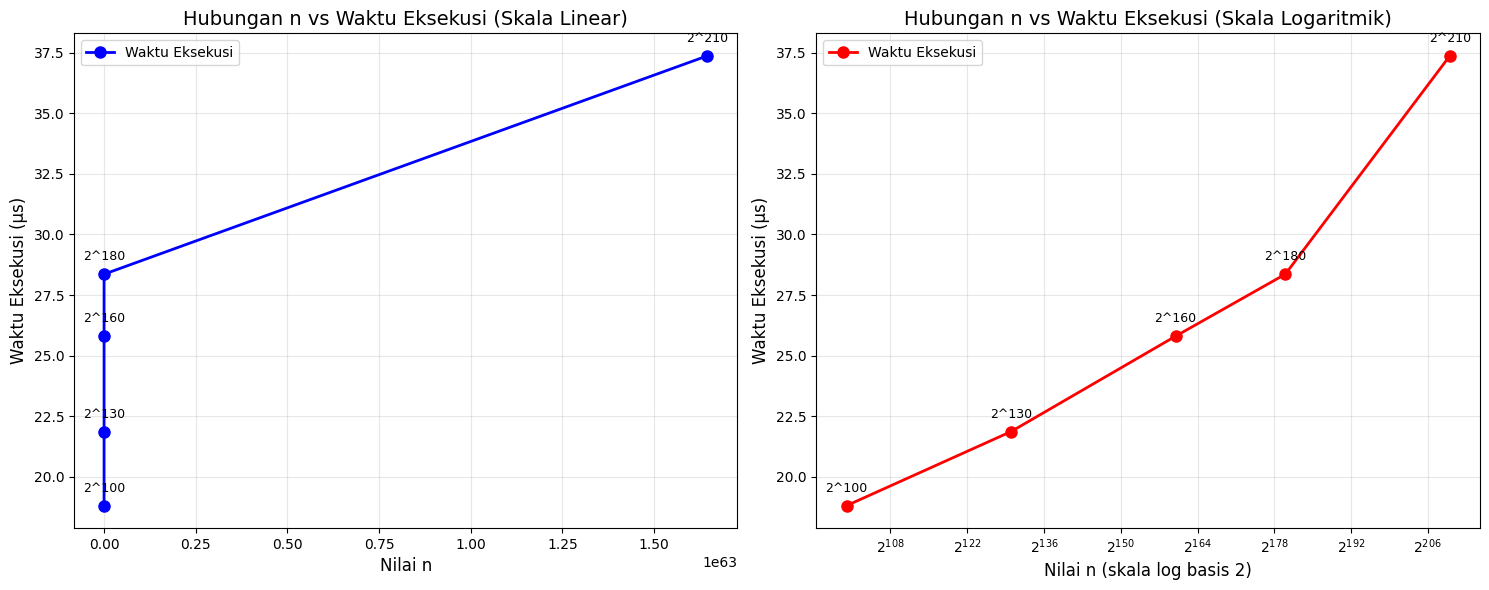

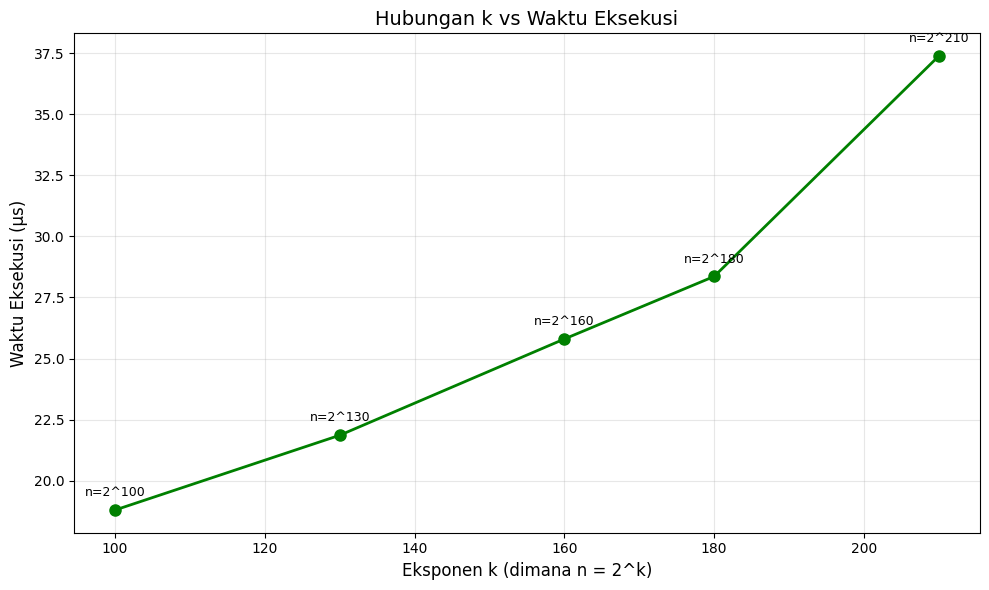

In [6]:
k = [100,130,160,180,210]
data=[]
for n in k:
    data.append(eksperimen1(n))

tabel_eksperimen1(data)
plot_hasil_eksperimen1(data)

# Eksperimen 2
Analisis running time untuk fungsi dengan kompleksitas n dan n log(n)

Eksperimen untuk n = 10³
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
--------------------------------------------------
1        66.90           1209.30             
2        68.70           1135.50             
3        70.10           1190.40             
4        69.30           1141.90             
5        70.30           1105.20             
--------------------------------------------------
Rata-rata 69.06           1156.46             

Eksperimen untuk n = 10⁴
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
--------------------------------------------------
1        750.60          19079.20            
2        634.20          15313.00            
3        725.10          9675.30             
4        325.00          8385.50             
5        337.50          8235.10             
--------------------------------------------------
Rata-rata 554.48          12137.62            

Eksperimen untuk n = 10⁵
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
---------------------------

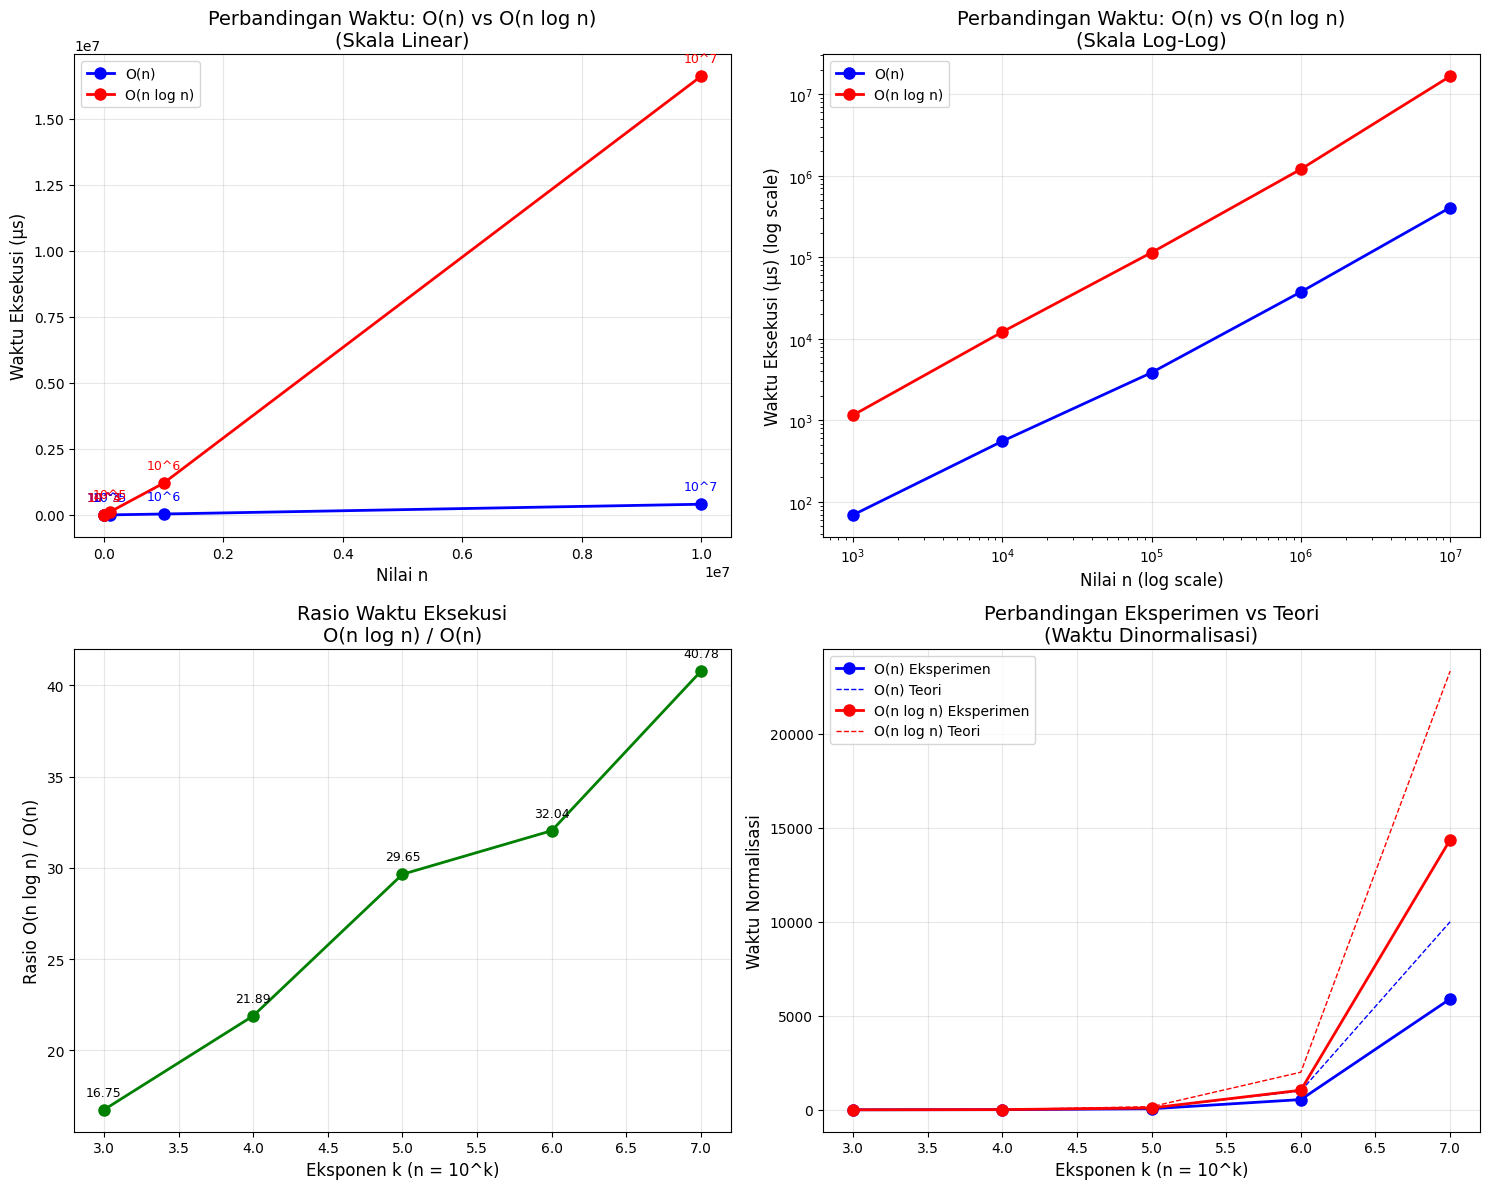

[16.745736746161548,
 21.890094850939974,
 29.64672137224416,
 32.03598729935804,
 40.77729048497085]

In [7]:
data = []
eks = [3,4,5,6,7]
for k in eks:
  data.append(eksperimen2(k))

buat_tabel_eksperimen2(data)
buat_grafik_eksperimen2(data)

# Eksperimen 3
Membandingkan algoritma untuk mencari maximum subsequence (MaxSubSUm)
### Fungsi `maxSubSum1`
Analisis relasi rekurensi fungsi ``maxSubSum1`` sbb:
\begin{align*}
T(n) = 
\begin{cases}
 1  &\text{jika } n = 1 \\
 T(n-1) + 1  &\text{jika }  n > 1 
\end{cases}
\end{align*}



#### Langkah-langkah Perhitungan:
1. **Ekspansi Relasi Rekurensi**:
   
   \begin{align*}
   T(n) &= T(n-1) + 1 \\
        &= [T(n-2) + 1] + 1 = T(n-2) + 2 \\
        &= [T(n-3) + 1] + 2 = T(n-3) + 3 \\
        &\quad \vdots \\
        &= T(1) + (n-1) \\
        &= 1 + (n-1) = n
   \end{align*}
   

### 2. **Hasil Akhir**:

\begin{equation}
   T(n) = n
\end{equation}

### 3. **Analisis Kompleksitas**:
- Karena  `T(n) = n` , maka  `T(n)`  tumbuh secara **linear** terhadap  `n` .
- Berdasarkan definisi **notasi Big-O**, kita dapat menyatakan persamaan berikut:

\begin{equation*}
  T(n) = O(n), \\
  \text{ karena terdapat konstanta } c = 1  \text{ dan } n_0 = 1  \text{ yang memenuhi ketentuan berikut:}
  T(n) \leq c \cdot n \quad \text{untuk semua} \quad n \geq n_0
\end{equation*}


**Bukti Formal**:
\begin{equation*}
T(n) \leq c \cdot n \quad \text{untuk semua} \quad n \geq n_0, \\
\text{dengan memilih } c = 1 \text{ dan } n_0 = 1, \text{ kondisi } T(n) = O(n) \text{ terpenuhi.}
\end{equation*}


### Fungsi `maxSubSum2`

Fungsi `maxSubSum2` mengimplementasikan pendekatan **Divide and Conquer** untuk menyelesaikan masalah Maximum Subarray Sum. Berikut adalah analisis kompleksitasnya:

#### Relasi Rekurensi

Untuk array dengan panjang `n`, relasi rekurensi algoritma ini adalah:

```
T(n) = 2T(n/2) + O(n)
```

Dimana:
- `2T(n/2)` merepresentasikan dua panggilan rekursif pada subarray berukuran `n/2`
- `O(n)` merepresentasikan perhitungan maximum border sum yang linear

\begin{align*}
T(n) &= 2T(n/2) + n \\
     &= 2[2T(n/4) + n/2] + n = 4T(n/4) + 2n \\
     &= 4[2T(n/8) + n/4] + 2n = 8T(n/8) + 3n \\
     &= \dots \\
     &= 2^k T\left(\frac{n}{2^k}\right) + k \cdot n
\end{align*}

\begin{align*}
   \text{Ketika } \frac{n}{2^k} = 1  \text{ atau } k = \log_2 n :
\end{align*}

\begin{align*}
T(n) &= 2^{\log_2 n} T(1) + n \log_2 n \\
     &= n \cdot T(1) + n \log_2 n \\
     &= O(n \log n) \quad \text{(karena } T(1) = O(1) \text{)}
\end{align*}



#### Break-down Kompleksitas

1. **Base Case**: O(1) - ketika `left == right`
2. **Divide**: 
   - 2 panggilan rekursif: `maxSubSum2(arr, left, center)` dan `maxSubSum2(arr, center + 1, right)`
3. **Conquer**:
   - Perhitungan `maxLeftBorderSum`: O(n/2)
   - Perhitungan `maxRightBorderSum`: O(n/2)
   - Total proses conquer: O(n)

### maxSubSum3

Algoritma `maxSubSum3` mengimplementasikan pendekatan **recursive brute-force** untuk menyelesaikan masalah Maximum Subarray Sum. Berikut adalah analisis kompleksitasnya:

#### Relasi Rekurensi

Untuk array dengan panjang `n`, relasi rekurensi algoritma ini adalah:

```
T(n) = T(n-1) + O(n)
```

Dimana:
- `T(n-1)` merepresentasikan panggilan rekursif `maxSubSum3(arr, i + 1)`
- `O(n)` merepresentasikan eksekusi fungsi `inner` yang memproses elemen dari indeks `i` sampai akhir

#### Penyelesaian Relasi Rekurensi

*Metode Ekspansi:*
```
T(n) = T(n-1) + n
     = [T(n-2) + (n-1)] + n = T(n-2) + (n-1) + n
     = [T(n-3) + (n-2)] + (n-1) + n = T(n-3) + (n-2) + (n-1) + n
     = ...
     = T(0) + 1 + 2 + 3 + ... + n
     = 1 + (1 + 2 + 3 + ... + n)
     = 1 + n(n+1)/2
     = O(n²)
```

*Penjelasan Langsung:*
Fungsi `inner` untuk setiap nilai `i` melakukan iterasi dari `i` sampai `n-1`, yang membutuhkan waktu `O(n-i)`. Total waktu:

```
T(n) = Σ(i=0 sampai n-1) O(n-i)
     = O(n + (n-1) + (n-2) + ... + 1)
     = O(n(n+1)/2)
     = O(n²)
```

## Break-down Kompleksitas

1. **Base Case**: O(1) - ketika `i >= n`
2. **Fungsi Inner**: 
   - Untuk setiap posisi awal `i`, fungsi `inner` menghitung semua subarray yang dimulai dari `i`
   - Kompleksitas: O(n-i) untuk setiap `i`
3. **Panggilan Rekursif**: `maxSubSum3(arr, i + 1)`


In [3]:
data = []
eks = [2,2.2,2.6,2.8,3,3.2,3.4]
for k in eks:
  data.append(eksperimen3(k))

Eksperimen untuk n = 10²
Run #    O(n) (µs)       O(nlog(n)) (µs)      O(n²) (µs)          
------------------------------------------------------------
1        76.50           191.00               1330.30                       
2        40.20           135.30               1425.40                       
3        61.80           198.80               1377.80                       
4        62.30           669.50               1114.40                       
5        52.50           235.20               1591.30                       
------------------------------------------------------------
Rata-rata 58.66            285.96          1367.84                       

Eksperimen untuk n = 10².²
Run #    O(n) (µs)       O(nlog(n)) (µs)      O(n²) (µs)          
------------------------------------------------------------
1        132.10          314.80               3340.30                       
2        89.80           326.50               3203.90                       
3        76.50   

HASIL EKSPERIMEN PERBANDINGAN KOMPLEKSITAS ALGORITMA
Eksponen (k) n = 10ᵏ         O(n) (µs)       O(n log n) (µs)      O(n²) (µs)     
----------------------------------------------------------------------------------------------------
2            100             58.66           285.96               1367.84        
2.2          158             96.08           327.76               3255.06        
2.6          398             331.32          860.64               20442.10       
2.8          631             407.60          1391.28              73091.58       
3            1000            769.06          2284.70              152654.60      
3.2          1585            2129.84         5772.64              660519.14      
3.4          2512            2760.68         7610.58              1477640.36     


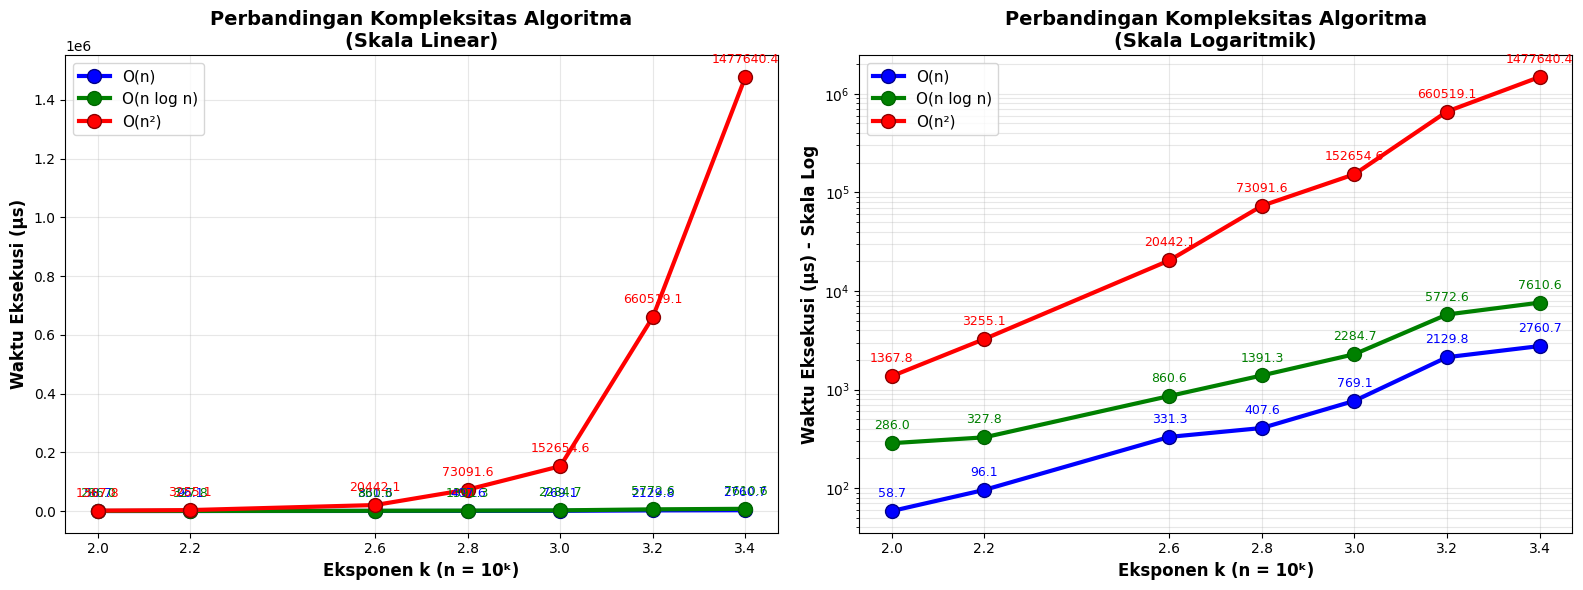

C:\Users\didik\AppData\Local\Temp\ipykernel_39024\377989773.py:528: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


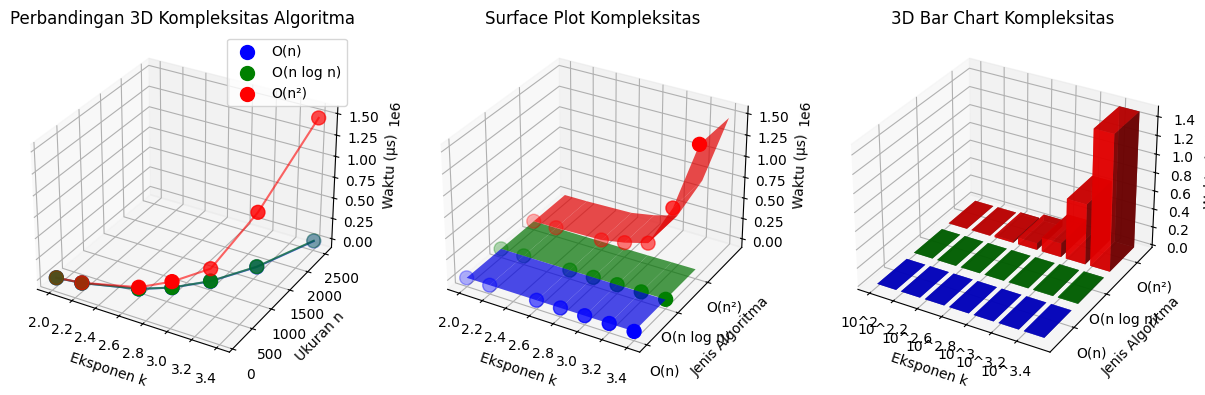

In [4]:
buat_tabel_eksperimen3(data)
buat_grafik_eksperimen3(data)
buat_grafik_3d_eksperimen3(data)

# Eksperimen 4 (Tugas 3)

In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def hiring_problem(candidates):
    best_candidate = None
    hire_count = 0

    for candidate in candidates:
        if best_candidate is None or candidate > best_candidate:
            best_candidate = candidate
            hire_count += 1

    return hire_count